In [4]:
import sys
import os
import numpy as np
import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt
# basins = ["cascades","california","northernrockies","whites","southernrockies"]
basins = ["california"]


In [5]:
# from pythonternary import ternary 
import ternary

99
True
[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]
[[ 0.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.   0.7  0.3]]


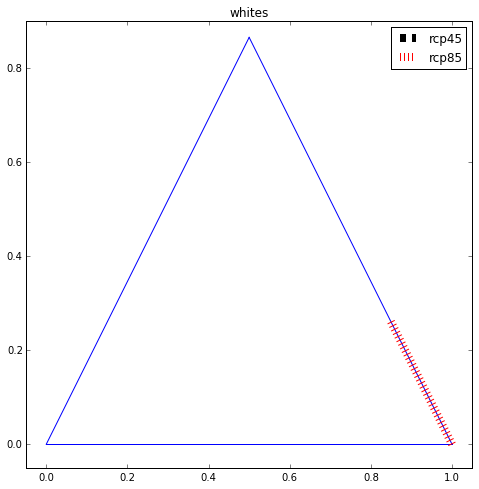

In [121]:
basin = "whites"
count = 0
fig = plt.figure(figsize=(8,8))
fs = 10
lw = 2.0
# for basin in basins: 
## get data
## historical
file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"historical")
data = np.load(file)
temp_avg_hist = data['temp_avg']
precip_hist = data['precip']
swe_hist = data['swe']
## rcp4.5
file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp45")
data = np.load(file)
swe_2010_2039_rcp45 = data['swe_2010_2039']
swe_2040_2069_rcp45 = data['swe_2040_2069']
swe_2070_2099_rcp45 = data['swe_2070_2099']
temp_avg_2010_2039_rcp45 = data['temp_avg_2010_2039']
temp_avg_2040_2069_rcp45 = data['temp_avg_2040_2069']
temp_avg_2070_2099_rcp45 = data['temp_avg_2070_2099']
## rcp8.5
file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp85")
data = np.load(file)
swe_2010_2039_rcp85 = data['swe_2010_2039']
swe_2040_2069_rcp85 = data['swe_2040_2069']
swe_2070_2099_rcp85 = data['swe_2070_2099']
temp_avg_2010_2039_rcp85 = data['temp_avg_2010_2039']
temp_avg_2040_2069_rcp85 = data['temp_avg_2040_2069']
temp_avg_2070_2099_rcp85 = data['temp_avg_2070_2099']
####################### bin by temperature and change classification in the future ############################
## hist class
## snow dominant
rd_cut = 278.15
sd_cut = 267.15
swe_sd_hist = swe_hist[temp_avg_hist <= sd_cut]
## transient
swe_tr_hist = swe_hist[(temp_avg_hist > sd_cut) & (temp_avg_hist < rd_cut)]
## rain dominant
swe_rd_hist = swe_hist[temp_avg_hist >= rd_cut]

## rcp45
## snow dominant
swe_sd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 <= sd_cut]
swe_sd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 <= sd_cut]
swe_sd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 <= sd_cut]

## transient
swe_tr_2010_2039_rcp45 = swe_2010_2039_rcp45[(temp_avg_2010_2039_rcp45 > sd_cut) & (temp_avg_2010_2039_rcp45 < rd_cut)]
swe_tr_2040_2069_rcp45 = swe_2040_2069_rcp45[(temp_avg_2040_2069_rcp45 > sd_cut) & (temp_avg_2040_2069_rcp45 < rd_cut)]
swe_tr_2070_2099_rcp45 = swe_2070_2099_rcp45[(temp_avg_2070_2099_rcp45 > sd_cut) & (temp_avg_2070_2099_rcp45 < rd_cut)]


## rain dominant
swe_rd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 >= rd_cut]
swe_rd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 >= rd_cut]
swe_rd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 >= rd_cut]


## rcp85
## snow dominant
swe_sd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 <= sd_cut]
swe_sd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 <= sd_cut]
swe_sd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 <= sd_cut]
## transient
swe_tr_2010_2039_rcp85 = swe_2010_2039_rcp85[(temp_avg_2010_2039_rcp85 > sd_cut) & (temp_avg_2010_2039_rcp85 < rd_cut)]
swe_tr_2040_2069_rcp85 = swe_2040_2069_rcp85[(temp_avg_2040_2069_rcp85 > sd_cut) & (temp_avg_2040_2069_rcp85 < rd_cut)]
swe_tr_2070_2099_rcp85 = swe_2070_2099_rcp85[(temp_avg_2070_2099_rcp85 > sd_cut) & (temp_avg_2070_2099_rcp85 < rd_cut)]

## rain dominant
swe_rd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 >= rd_cut]
swe_rd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 >= rd_cut]
swe_rd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 >= rd_cut]


################################################### TERNARY PLOT #####################################################
steps = 1.0

ax = ternary.draw_boundary(steps)
# ternary.draw_gridlines(steps, ax=ax)
ax.set_title("Simplex Boundary and Gridlines")
# Points is a list of tuples or numpy arrays, e.g. [(0.5, 0.25, 0.25), (1./3, 1./3, 1//3)]. 
hist_tot = len(swe_sd_hist) + len(swe_tr_hist) + len(swe_rd_hist)
fut1_rcp45 = len(swe_sd_2010_2039_rcp45) + len(swe_tr_2010_2039_rcp45) + len(swe_rd_2010_2039_rcp45)
fut2_rcp45 = len(swe_sd_2040_2069_rcp45) + len(swe_tr_2040_2069_rcp45) + len(swe_rd_2040_2069_rcp45)
fut3_rcp45 = len(swe_sd_2070_2099_rcp45) + len(swe_tr_2070_2099_rcp45) + len(swe_rd_2070_2099_rcp45)

fut1_rcp85 = len(swe_sd_2010_2039_rcp85) + len(swe_tr_2010_2039_rcp85) + len(swe_rd_2010_2039_rcp85)
fut2_rcp85 = len(swe_sd_2040_2069_rcp85) + len(swe_tr_2040_2069_rcp85) + len(swe_rd_2040_2069_rcp85)
fut3_rcp85 = len(swe_sd_2070_2099_rcp85) + len(swe_tr_2070_2099_rcp85) + len(swe_rd_2070_2099_rcp85)
# g = 1.*len(swe_sd_hist)/hist_tot
# order: SD, TR, RD
off = 0.5
st = 500
lw = 8.0
points_rcp45 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
              (1.*len(swe_sd_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_tr_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_rd_2010_2039_rcp45)/fut1_rcp45),
              (1.*len(swe_sd_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_tr_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_rd_2040_2069_rcp45)/fut2_rcp45),
              (1.*len(swe_sd_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_tr_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_rd_2070_2099_rcp45)/fut3_rcp45)]

ternary.plot(points_rcp45, ax=ax, steps=st, linewidth=lw,color='k',linestyle='--',label='rcp45')
points_rcp85 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
              (1.*len(swe_sd_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_tr_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_rd_2010_2039_rcp85)/fut1_rcp85),
              (1.*len(swe_sd_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_tr_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_rd_2040_2069_rcp85)/fut2_rcp85),
              (1.*len(swe_sd_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_tr_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_rd_2070_2099_rcp85)/fut3_rcp85)]
ternary.plot(points_rcp85, ax=ax, steps=st, linewidth=lw,color='r',linestyle=':',label='rcp85')
np.set_printoptions(suppress=True)
print(hist_tot)
print(fut1_rcp45 == fut2_rcp45 == fut3_rcp45 == fut1_rcp85 == fut2_rcp85 == fut3_rcp85)
print(np.around(np.asarray(points_rcp45),2))
print(np.around(np.asarray(points_rcp85),2))
ax.set_title('%s' %basin)
plt.legend()
#print(hist_tot)
#print(fut1_rcp85)
plt.show()


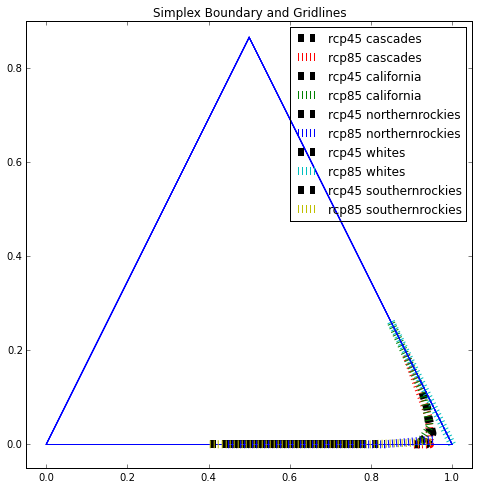

In [96]:
basins = ["cascades","california","northernrockies","whites","southernrockies"]
colors = ['r','g','b','c','y']
count = 0
fig = plt.figure(figsize=(8,8))
fs = 10
lw = 2.0
for basin in basins: 
    ## get data
    ## historical
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"historical")
    data = np.load(file)
    temp_avg_hist = data['temp_avg']
    precip_hist = data['precip']
    swe_hist = data['swe']
    ## rcp4.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp45")
    data = np.load(file)
    swe_2010_2039_rcp45 = data['swe_2010_2039']
    swe_2040_2069_rcp45 = data['swe_2040_2069']
    swe_2070_2099_rcp45 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp45 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp45 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp45 = data['temp_avg_2070_2099']
    ## rcp8.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp85")
    data = np.load(file)
    swe_2010_2039_rcp85 = data['swe_2010_2039']
    swe_2040_2069_rcp85 = data['swe_2040_2069']
    swe_2070_2099_rcp85 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp85 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp85 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp85 = data['temp_avg_2070_2099']
    ####################### bin by temperature and change classification in the future ############################
    ## hist class
    ## snow dominant
    rd_cut = 278.15
    sd_cut = 267.15
    swe_sd_hist = swe_hist[temp_avg_hist <= sd_cut]
    ## transient
    swe_tr_hist = swe_hist[(temp_avg_hist > sd_cut) & (temp_avg_hist < rd_cut)]
    ## rain dominant
    swe_rd_hist = swe_hist[temp_avg_hist >= rd_cut]

    ## rcp45
    ## snow dominant
    swe_sd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 <= sd_cut]
    swe_sd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 <= sd_cut]
    swe_sd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 <= sd_cut]

    ## transient
    swe_tr_2010_2039_rcp45 = swe_2010_2039_rcp45[(temp_avg_2010_2039_rcp45 > sd_cut) & (temp_avg_2010_2039_rcp45 < rd_cut)]
    swe_tr_2040_2069_rcp45 = swe_2040_2069_rcp45[(temp_avg_2040_2069_rcp45 > sd_cut) & (temp_avg_2040_2069_rcp45 < rd_cut)]
    swe_tr_2070_2099_rcp45 = swe_2070_2099_rcp45[(temp_avg_2070_2099_rcp45 > sd_cut) & (temp_avg_2070_2099_rcp45 < rd_cut)]


    ## rain dominant
    swe_rd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 >= rd_cut]
    swe_rd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 >= rd_cut]
    swe_rd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 >= rd_cut]


    ## rcp85
    ## snow dominant
    swe_sd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 <= sd_cut]
    swe_sd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 <= sd_cut]
    swe_sd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 <= sd_cut]
    ## transient
    swe_tr_2010_2039_rcp85 = swe_2010_2039_rcp85[(temp_avg_2010_2039_rcp85 > sd_cut) & (temp_avg_2010_2039_rcp85 < rd_cut)]
    swe_tr_2040_2069_rcp85 = swe_2040_2069_rcp85[(temp_avg_2040_2069_rcp85 > sd_cut) & (temp_avg_2040_2069_rcp85 < rd_cut)]
    swe_tr_2070_2099_rcp85 = swe_2070_2099_rcp85[(temp_avg_2070_2099_rcp85 > sd_cut) & (temp_avg_2070_2099_rcp85 < rd_cut)]

    ## rain dominant
    swe_rd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 >= rd_cut]
    swe_rd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 >= rd_cut]
    swe_rd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 >= rd_cut]


    ################################################### TERNARY PLOT #####################################################
    steps = 1.0

    ax = ternary.draw_boundary(steps)
    # ternary.draw_gridlines(steps, ax=ax)
    ax.set_title("Simplex Boundary and Gridlines")
    # Points is a list of tuples or numpy arrays, e.g. [(0.5, 0.25, 0.25), (1./3, 1./3, 1//3)]. 
    hist_tot = len(swe_sd_hist) + len(swe_tr_hist) + len(swe_rd_hist)
    fut1_rcp45 = len(swe_sd_2010_2039_rcp45) + len(swe_tr_2010_2039_rcp45) + len(swe_rd_2010_2039_rcp45)
    fut2_rcp45 = len(swe_sd_2040_2069_rcp45) + len(swe_tr_2040_2069_rcp45) + len(swe_rd_2040_2069_rcp45)
    fut3_rcp45 = len(swe_sd_2070_2099_rcp45) + len(swe_tr_2070_2099_rcp45) + len(swe_rd_2070_2099_rcp45)

    fut1_rcp85 = len(swe_sd_2010_2039_rcp85) + len(swe_tr_2010_2039_rcp85) + len(swe_rd_2010_2039_rcp85)
    fut2_rcp85 = len(swe_sd_2040_2069_rcp85) + len(swe_tr_2040_2069_rcp85) + len(swe_rd_2040_2069_rcp85)
    fut3_rcp85 = len(swe_sd_2070_2099_rcp85) + len(swe_tr_2070_2099_rcp85) + len(swe_rd_2070_2099_rcp85)
    # g = 1.*len(swe_sd_hist)/hist_tot
    # order: SD, TR, RD
    off = 0.5
    st = 500
    lw = 8.0
    points_rcp45 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
                  (1.*len(swe_sd_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_tr_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_rd_2010_2039_rcp45)/fut1_rcp45),
                  (1.*len(swe_sd_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_tr_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_rd_2040_2069_rcp45)/fut2_rcp45),
                  (1.*len(swe_sd_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_tr_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_rd_2070_2099_rcp45)/fut3_rcp45)]
    label1 = 'rcp45 %s' %basin 
    ternary.plot(points_rcp45, ax=ax, steps=st, linewidth=lw,color='k',linestyle='--',label=label1)
    points_rcp85 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
                  (1.*len(swe_sd_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_tr_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_rd_2010_2039_rcp85)/fut1_rcp85),
                  (1.*len(swe_sd_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_tr_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_rd_2040_2069_rcp85)/fut2_rcp85),
                  (1.*len(swe_sd_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_tr_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_rd_2070_2099_rcp85)/fut3_rcp85)]
    label2 = 'rcp85 %s' %basin 
    ternary.plot(points_rcp85, ax=ax, steps=st, linewidth=lw,color=colors[count],linestyle=':',label=label2)
    #print(np.asarray(points_rcp45))
    #print(np.asarray(points_rcp85))
    count += 1
plt.legend()
    #print(hist_tot)
    #print(fut1_rcp85)
plt.show()

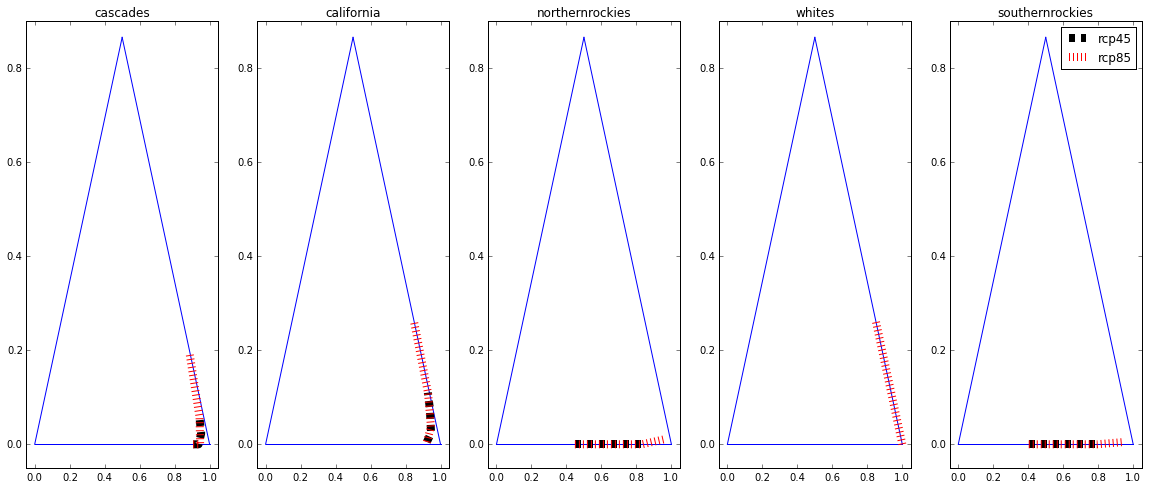

In [112]:
basins = ["cascades","california","northernrockies","whites","southernrockies"]
colors = ['r','g','b','c','y']
count = 0
fig = plt.figure(figsize=(20,8))
fs = 10
lw = 2.0
for basin in basins: 
    ## get data
    ## historical
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"historical")
    data = np.load(file)
    temp_avg_hist = data['temp_avg']
    precip_hist = data['precip']
    swe_hist = data['swe']
    ## rcp4.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp45")
    data = np.load(file)
    swe_2010_2039_rcp45 = data['swe_2010_2039']
    swe_2040_2069_rcp45 = data['swe_2040_2069']
    swe_2070_2099_rcp45 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp45 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp45 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp45 = data['temp_avg_2070_2099']
    ## rcp8.5
    file = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data/ensavg_%s_%s.npz' %(basin,"rcp85")
    data = np.load(file)
    swe_2010_2039_rcp85 = data['swe_2010_2039']
    swe_2040_2069_rcp85 = data['swe_2040_2069']
    swe_2070_2099_rcp85 = data['swe_2070_2099']
    temp_avg_2010_2039_rcp85 = data['temp_avg_2010_2039']
    temp_avg_2040_2069_rcp85 = data['temp_avg_2040_2069']
    temp_avg_2070_2099_rcp85 = data['temp_avg_2070_2099']
    ####################### bin by temperature and change classification in the future ############################
    ## hist class
    ## snow dominant
    rd_cut = 278.15
    sd_cut = 267.15
    swe_sd_hist = swe_hist[temp_avg_hist <= sd_cut]
    ## transient
    swe_tr_hist = swe_hist[(temp_avg_hist > sd_cut) & (temp_avg_hist < rd_cut)]
    ## rain dominant
    swe_rd_hist = swe_hist[temp_avg_hist >= rd_cut]

    ## rcp45
    ## snow dominant
    swe_sd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 <= sd_cut]
    swe_sd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 <= sd_cut]
    swe_sd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 <= sd_cut]

    ## transient
    swe_tr_2010_2039_rcp45 = swe_2010_2039_rcp45[(temp_avg_2010_2039_rcp45 > sd_cut) & (temp_avg_2010_2039_rcp45 < rd_cut)]
    swe_tr_2040_2069_rcp45 = swe_2040_2069_rcp45[(temp_avg_2040_2069_rcp45 > sd_cut) & (temp_avg_2040_2069_rcp45 < rd_cut)]
    swe_tr_2070_2099_rcp45 = swe_2070_2099_rcp45[(temp_avg_2070_2099_rcp45 > sd_cut) & (temp_avg_2070_2099_rcp45 < rd_cut)]


    ## rain dominant
    swe_rd_2010_2039_rcp45 = swe_2010_2039_rcp45[temp_avg_2010_2039_rcp45 >= rd_cut]
    swe_rd_2040_2069_rcp45 = swe_2040_2069_rcp45[temp_avg_2040_2069_rcp45 >= rd_cut]
    swe_rd_2070_2099_rcp45 = swe_2070_2099_rcp45[temp_avg_2070_2099_rcp45 >= rd_cut]


    ## rcp85
    ## snow dominant
    swe_sd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 <= sd_cut]
    swe_sd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 <= sd_cut]
    swe_sd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 <= sd_cut]
    ## transient
    swe_tr_2010_2039_rcp85 = swe_2010_2039_rcp85[(temp_avg_2010_2039_rcp85 > sd_cut) & (temp_avg_2010_2039_rcp85 < rd_cut)]
    swe_tr_2040_2069_rcp85 = swe_2040_2069_rcp85[(temp_avg_2040_2069_rcp85 > sd_cut) & (temp_avg_2040_2069_rcp85 < rd_cut)]
    swe_tr_2070_2099_rcp85 = swe_2070_2099_rcp85[(temp_avg_2070_2099_rcp85 > sd_cut) & (temp_avg_2070_2099_rcp85 < rd_cut)]

    ## rain dominant
    swe_rd_2010_2039_rcp85 = swe_2010_2039_rcp85[temp_avg_2010_2039_rcp85 >= rd_cut]
    swe_rd_2040_2069_rcp85 = swe_2040_2069_rcp85[temp_avg_2040_2069_rcp85 >= rd_cut]
    swe_rd_2070_2099_rcp85 = swe_2070_2099_rcp85[temp_avg_2070_2099_rcp85 >= rd_cut]


    ################################################### TERNARY PLOT #####################################################
    steps = 1.0
    ax1 = fig.add_subplot(1,5,count+1)
    # ax1 = subplot(number_of_subplots,1,v)
    ax = ternary.draw_boundary(steps,ax=ax1)
    # ternary.draw_gridlines(steps, ax=ax)
    # ax.set_title("Simplex Boundary and Gridlines")
    # Points is a list of tuples or numpy arrays, e.g. [(0.5, 0.25, 0.25), (1./3, 1./3, 1//3)]. 
    hist_tot = len(swe_sd_hist) + len(swe_tr_hist) + len(swe_rd_hist)
    fut1_rcp45 = len(swe_sd_2010_2039_rcp45) + len(swe_tr_2010_2039_rcp45) + len(swe_rd_2010_2039_rcp45)
    fut2_rcp45 = len(swe_sd_2040_2069_rcp45) + len(swe_tr_2040_2069_rcp45) + len(swe_rd_2040_2069_rcp45)
    fut3_rcp45 = len(swe_sd_2070_2099_rcp45) + len(swe_tr_2070_2099_rcp45) + len(swe_rd_2070_2099_rcp45)

    fut1_rcp85 = len(swe_sd_2010_2039_rcp85) + len(swe_tr_2010_2039_rcp85) + len(swe_rd_2010_2039_rcp85)
    fut2_rcp85 = len(swe_sd_2040_2069_rcp85) + len(swe_tr_2040_2069_rcp85) + len(swe_rd_2040_2069_rcp85)
    fut3_rcp85 = len(swe_sd_2070_2099_rcp85) + len(swe_tr_2070_2099_rcp85) + len(swe_rd_2070_2099_rcp85)
    # g = 1.*len(swe_sd_hist)/hist_tot
    # order: SD, TR, RD
    off = 0.5
    st = 500
    lw = 8.0
    points_rcp45 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
                  (1.*len(swe_sd_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_tr_2010_2039_rcp45)/fut1_rcp45,1.*len(swe_rd_2010_2039_rcp45)/fut1_rcp45),
                  (1.*len(swe_sd_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_tr_2040_2069_rcp45)/fut2_rcp45,1.*len(swe_rd_2040_2069_rcp45)/fut2_rcp45),
                  (1.*len(swe_sd_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_tr_2070_2099_rcp45)/fut3_rcp45,1.*len(swe_rd_2070_2099_rcp45)/fut3_rcp45)]
    label1 = 'rcp45 %s' %basin 
    ternary.plot(points_rcp45, ax=ax, steps=st, linewidth=lw,color='k',linestyle='--',label='rcp45')
    points_rcp85 = [(1.*len(swe_sd_hist)/hist_tot,1.*len(swe_tr_hist)/hist_tot,1.*len(swe_rd_hist)/hist_tot),
                  (1.*len(swe_sd_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_tr_2010_2039_rcp85)/fut1_rcp85,1.*len(swe_rd_2010_2039_rcp85)/fut1_rcp85),
                  (1.*len(swe_sd_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_tr_2040_2069_rcp85)/fut2_rcp85,1.*len(swe_rd_2040_2069_rcp85)/fut2_rcp85),
                  (1.*len(swe_sd_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_tr_2070_2099_rcp85)/fut3_rcp85,1.*len(swe_rd_2070_2099_rcp85)/fut3_rcp85)]
    label2 = 'rcp85 %s' %basin 
    ternary.plot(points_rcp85, ax=ax, steps=st, linewidth=lw,color='r',linestyle=':',label='rcp85')
    #print(np.asarray(points_rcp45))
    #print(np.asarray(points_rcp85))
    ax.set_title('%s' %basin)
    count += 1
plt.legend(loc='upper right')
    #print(hist_tot)
    #print(fut1_rcp85)
plt.show()

saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/RD_TR_SD_ternary'


/home/gergel/anaconda/envs/my_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


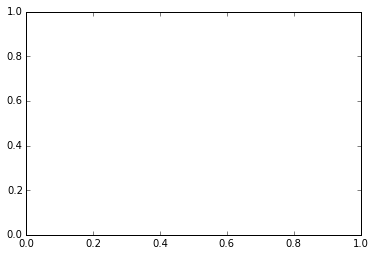

In [75]:
plt.legend(loc='lower left',prop={'size':15},bbox_to_anchor=(1, 0.5))
fig.text(0.5, 0.05, 'SWE (mm)', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.5, 'Probability', va='center', rotation='vertical',size = 'x-large')
## save plot
plotname = 'RD_TR_SD_ternary' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/changeclass/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath)